<center><h1>  Machine learning assignment 1 Group 105          

## Problem Statement



Dataset - https://drive.google.com/file/d/1W9RO7AJ2lBQF-DzJQAMNfEXyGvJI_hVm/view?usp=sharing 
The given dataset is from Dream Club which connects borrowers with investors. We will use lending data from 2007-2010 and build a classifier model to predict whether or not the borrower has paid back their loan in full. Here are what the columns represent:
 
	credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
	purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
	int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
	installment: The monthly installments owed by the borrower if the loan is funded.
	log.annual.inc: The natural log of the self-reported annual income of the borrower.
	dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
	fico: The FICO credit score of the borrower.
	days.with.cr.line: The number of days the borrower has had a credit line.
	revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
	revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
	inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
	delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
	pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
	not.fully.paid: whether or not the borrower paid back their loan in full

## List only the BITS (Name) of active contributors in this assignment:
1. KISHAN KUMAR - 2022da04047@wilp.bits-pilani.ac.in
2. ABHISHEK KUMAR - 2022da04039@wilp.bits-pilani.ac.in
3. Mohit Misra - 2022da04662@wilp.bits-pilani.ac.in 


## 1. Import Libraries/Dataset
###### a.	Download the dataset
###### b.	Import the required libraries


In [8]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")
%matplotlib inline

# Load the dataset
url = "https://drive.google.com/uc?id=1W9RO7AJ2lBQF-DzJQAMNfEXyGvJI_hVm"
credit = pd.read_csv(url) #Use pandas to read data.
df=pd.DataFrame(credit)

C:\Users\jhaki\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## 2.Data Visualization and Exploration

##### a.Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [9]:
#print first 5 rows
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [10]:
#lets check all columns 

df.columns.to_list()

['credit.policy',
 'purpose',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid']

##### b.	Print the description and shape of the dataset

In [11]:
#this will give number if non - null and datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


 ⇧ **we can see there seems to be no Null containing columns and all columns are numerical excepet the purpose column**

In [12]:
#this will provide numerical description of all **numerical columns**
k=credit.describe()
k

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [13]:
k.round(3)# rounding off the demical upto 3 place

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000
mean,0.805,0.123,319.089,10.932,12.607,710.846,4560.767,16913.964,46.799,1.577,0.164,0.062,0.160
std,0.396,0.027,207.071,0.615,6.884,37.971,2496.930,33756.190,29.014,2.200,0.546,0.262,0.367
min,0.000,0.060,15.670,7.548,0.000,612.000,178.958,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,0.104,163.770,10.558,7.212,682.000,2820.000,3187.000,22.600,0.000,0.000,0.000,0.000
50%,1.000,0.122,268.950,10.929,12.665,707.000,4139.958,8596.000,46.300,1.000,0.000,0.000,0.000
75%,1.000,0.141,432.762,11.291,17.950,737.000,5730.000,18249.500,70.900,2.000,0.000,0.000,0.000
max,1.000,0.216,940.140,14.528,29.960,827.000,17639.958,1207359.000,119.000,33.000,13.000,5.000,1.000


In [14]:
df.shape

(9578, 14)

⇨ **Here we can see the data has 9578 rows and 15 columns**

##### c.	Provide appropriate visualization to get an insight about the dataset. 

In [15]:
##We can do it by using pairplot

Text(0.5, 1.0, 'Pairplot of data to get a rough insgight about data')

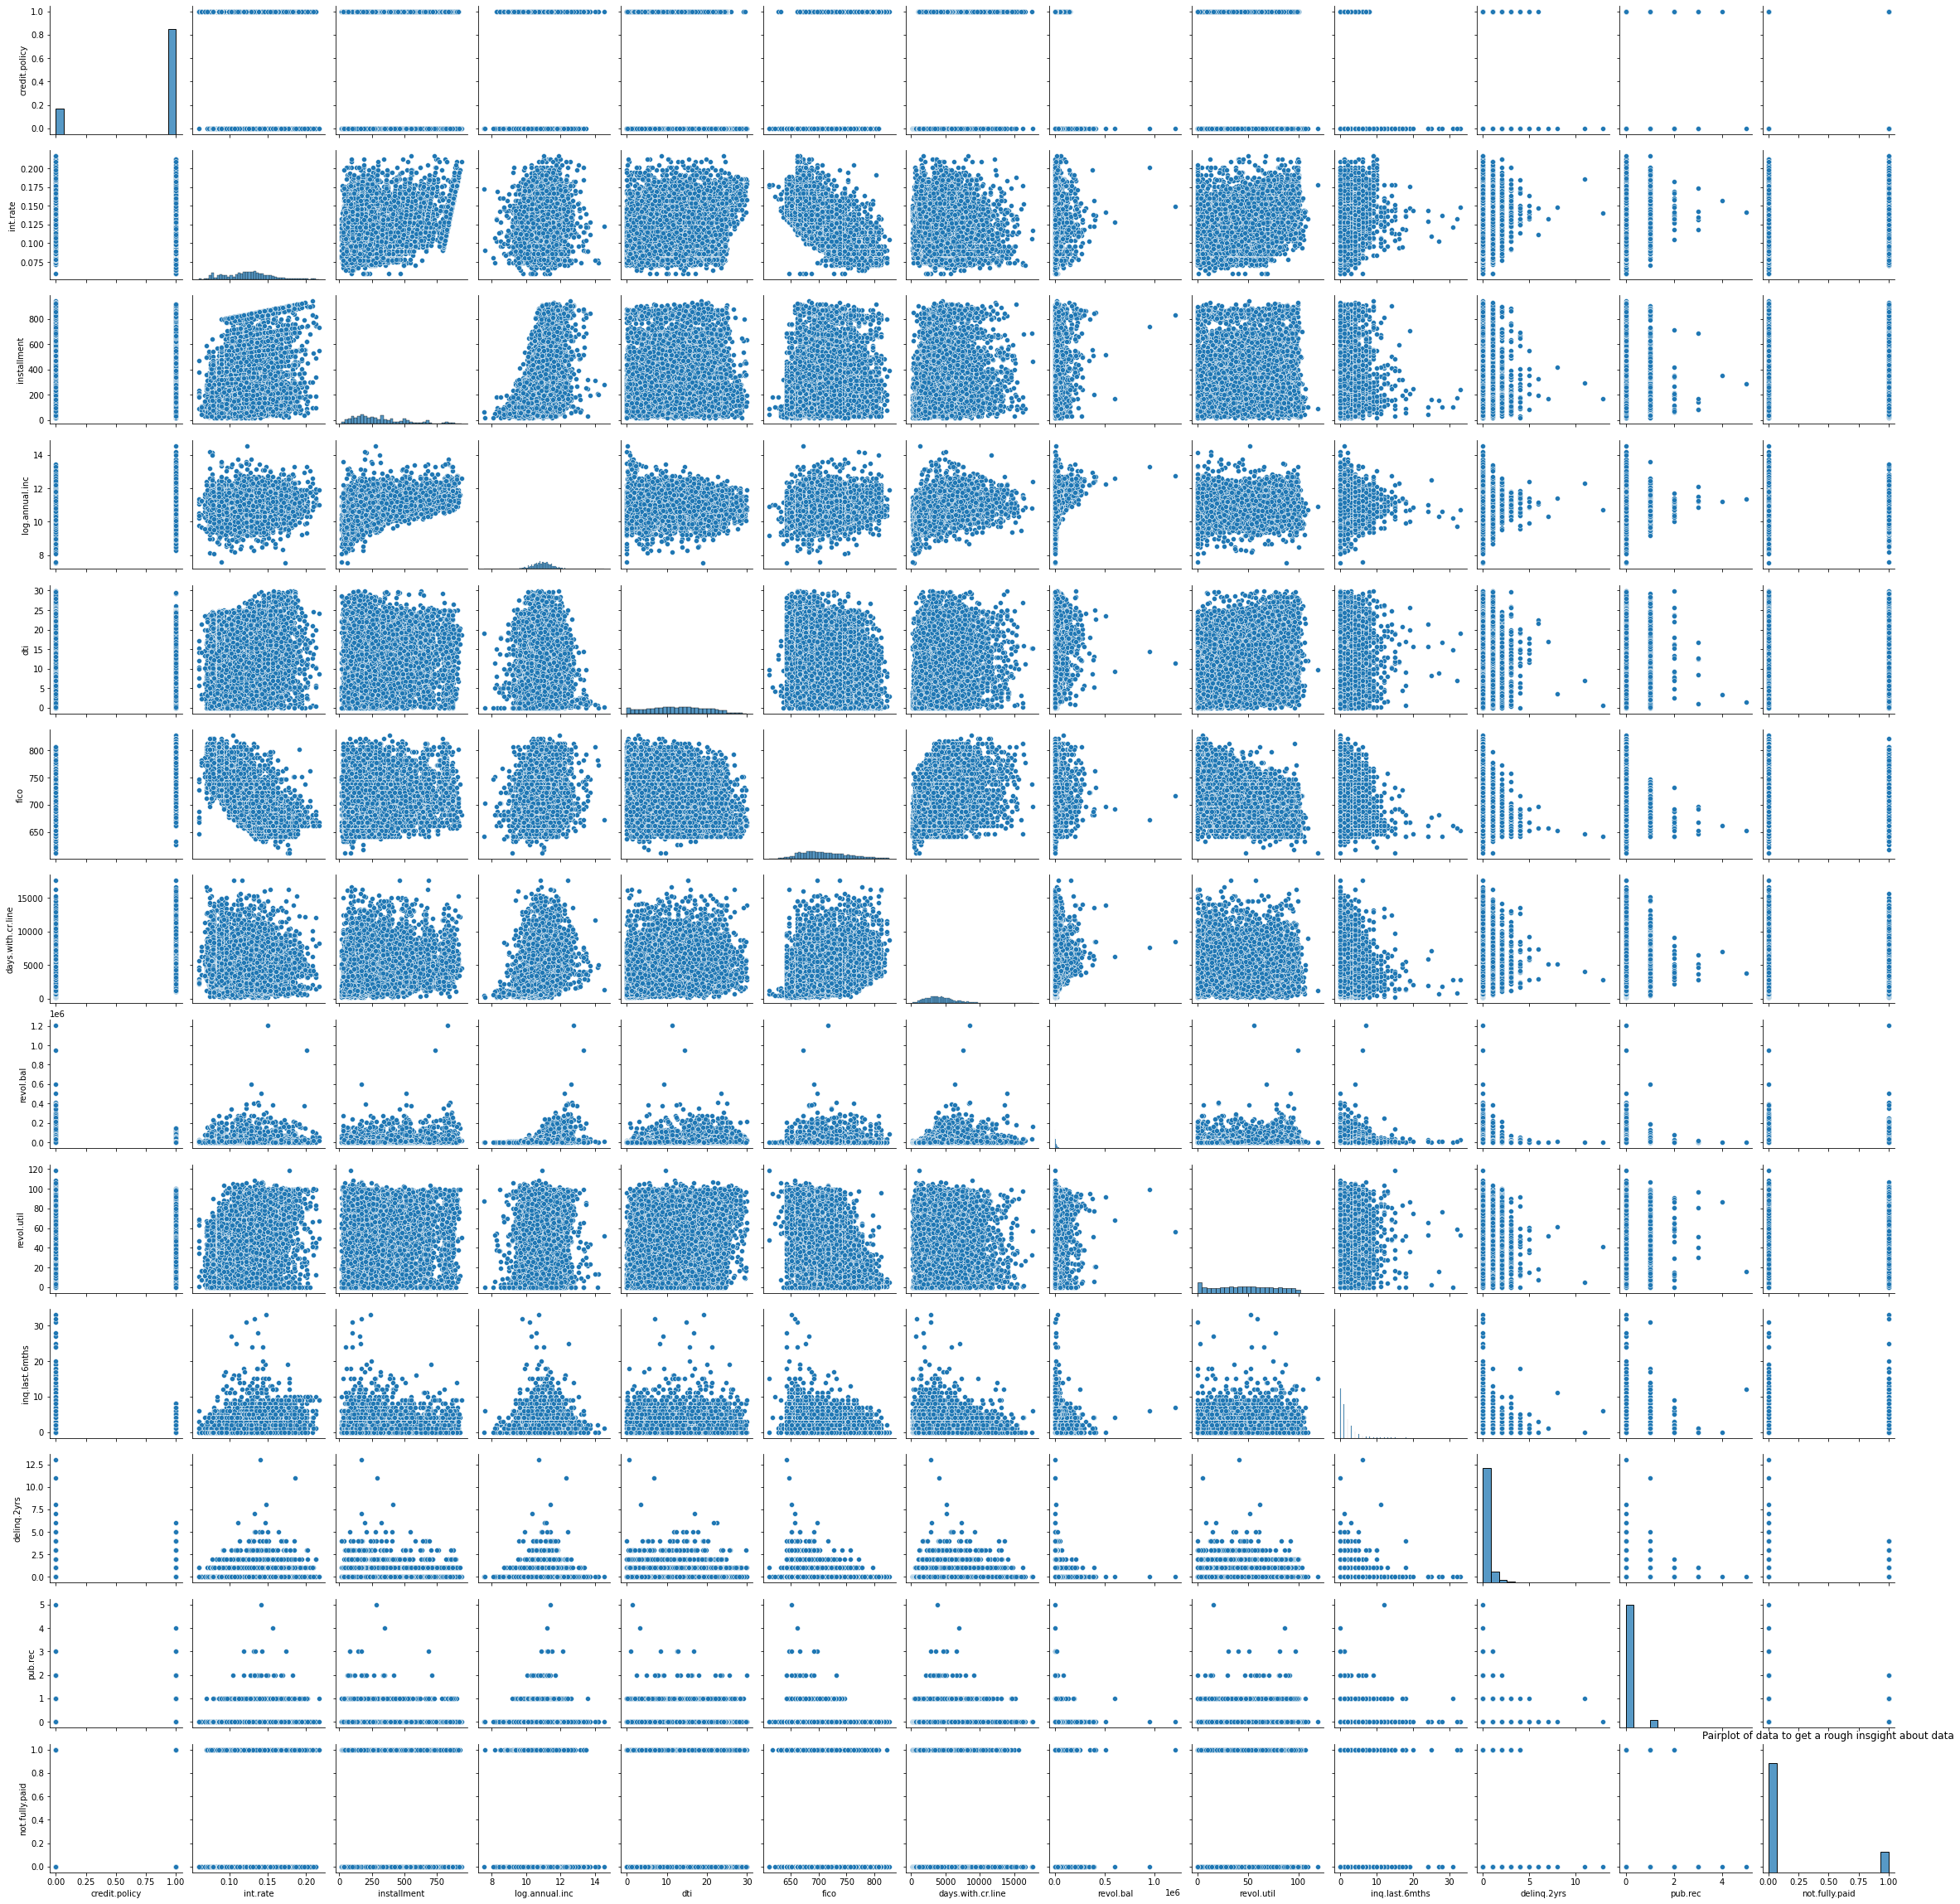

In [16]:
sns.pairplot(df)
plt.title("Pairplot of data to get a rough insgight about data")

- > ###### insights from pairplot
    - Credit policy, delinq.2yrs, pub.rec, not.fully.paid seems to be binary & discrete
    - Most numerical values seems to either uniform or near to be nornally distributed

##### d.	Try exploring the data and see what insights can be drawn from the dataset. 

In [17]:
print("feature : unique numerical values \n")
for i in df.columns:
    print(f"{i} : {df[i].nunique()}")

feature : unique numerical values 

credit.policy : 2
purpose : 7
int.rate : 249
installment : 4788
log.annual.inc : 1987
dti : 2529
fico : 44
days.with.cr.line : 2687
revol.bal : 7869
revol.util : 1035
inq.last.6mths : 28
delinq.2yrs : 11
pub.rec : 6
not.fully.paid : 2


- >  so we can see  purpose , pub.rec, not.fully.paid and even inq.last.6mths are catergorical variable including the label which is credit policy.
But with respect to defintion of data we can see **only purpose is nominal and other are ordinal varibles**

In [270]:
df.duplicated().sum()

0

- > there is no duplicate rows 

In [18]:
##---------Check for missing data -----------------##
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

- > there is no na values in the dataset

- Let's visualise some data now! We'll use the built-in charting features of Seaborn and Pandas.

#### credit.policy

In [19]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

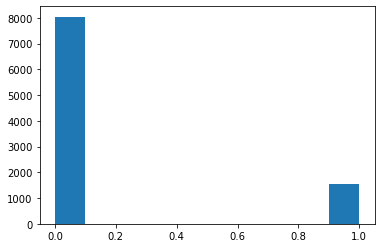

In [20]:
plt.hist(df['not.fully.paid']);

In [21]:
df['not.fully.paid'].value_counts(normalize=True)

0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

- > The data is highly imbalnaced , As we have 84% belong to class 1 and 16%  to class 0 

#### fico

-  Make a histogram with two **FICO distributions** stacked on top of one another, one for each result of the credit policy.

Text(0.5, 1.0, 'Distribution of fico score for credit policy \n')

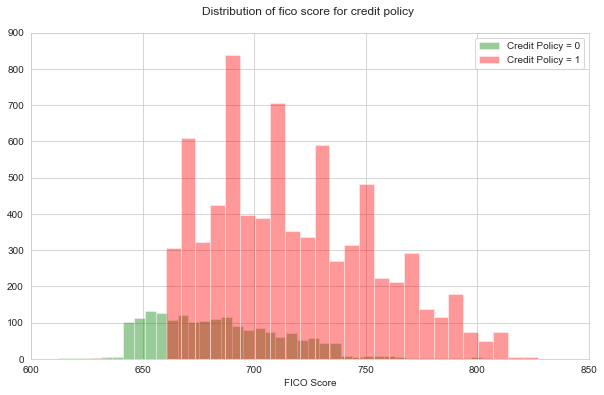

In [22]:
sns.set_style("whitegrid")
# Create a figure and axis with the specified figsize
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the distribution of 'fico' for credit.policy=0
sns.distplot(credit[credit['credit.policy'] == 0]['fico'], bins=40, kde=False, color='green', label='Credit Policy = 0')

# Plot the distribution of 'fico' for credit.policy=1
sns.distplot(credit[credit['credit.policy'] == 1]['fico'], bins=30, kde=False, color='red', label='Credit Policy = 1')

# Set the x-axis and y-axis limits
ax.set_xlim(600, 850)
ax.set_ylim(0, 900)

# Add a legend to the plot
ax.legend(loc=1)

# Set the x-axis label
ax.set_xlabel('FICO Score')

plt.title("Distribution of fico score for credit policy \n")


###### Create a similar figure, except this time select by the **not.fully.paid column.**

Text(0.5, 1.0, 'Distribution of fico score for not.fully.paid \n')

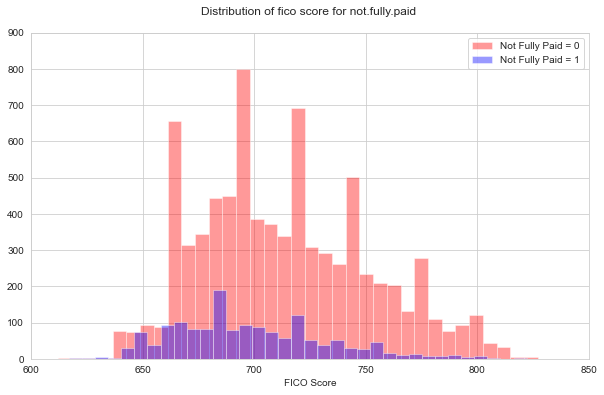

In [23]:
# Create a figure and axis with the specified figsize
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the distribution of 'fico' for not.fully.paid=0
sns.distplot(credit[credit['not.fully.paid'] == 0]['fico'], bins=35, kde=False, color='red', label='Not Fully Paid = 0')

# Plot the distribution of 'fico' for not.fully.paid=1
sns.distplot(credit[credit['not.fully.paid'] == 1]['fico'], bins=35, kde=False, color='blue', label='Not Fully Paid = 1')

# Set the x-axis and y-axis limits
ax.set_xlim(600, 850)
ax.set_ylim(0, 900)

# Add a legend to the plot
ax.legend(loc=1)

# Set the x-axis label
ax.set_xlabel('FICO Score')

plt.title("Distribution of fico score for not.fully.paid \n")


- we can see people who has not fully paid seems to have a low FICO score. This seems to be logical.

Text(0.5, 1.0, 'Distribution of fico score for not.fully.paid \n')

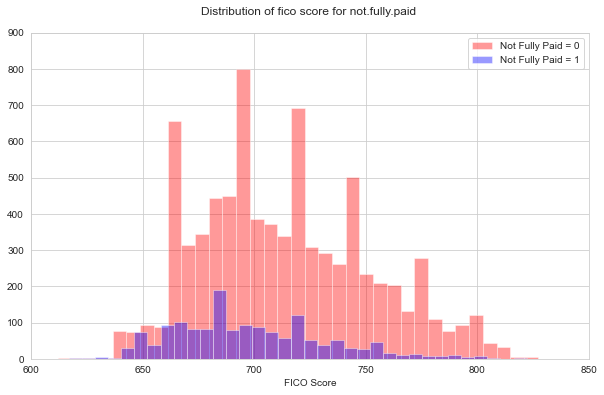

In [24]:
# Create a figure and axis with the specified figsize
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the distribution of 'fico' for not.fully.paid=0
sns.distplot(credit[credit['not.fully.paid'] == 0]['fico'], bins=35, kde=False, color='red', label='Not Fully Paid = 0')

# Plot the distribution of 'fico' for not.fully.paid=1
sns.distplot(credit[credit['not.fully.paid'] == 1]['fico'], bins=35, kde=False, color='blue', label='Not Fully Paid = 1')

# Set the x-axis and y-axis limits
ax.set_xlim(600, 850)
ax.set_ylim(0, 900)

# Add a legend to the plot
ax.legend(loc=1)

# Set the x-axis label
ax.set_xlabel('FICO Score')

plt.title("Distribution of fico score for not.fully.paid \n")

Text(0.5, 1.0, 'Distribution of installment score for credit.policy \n')

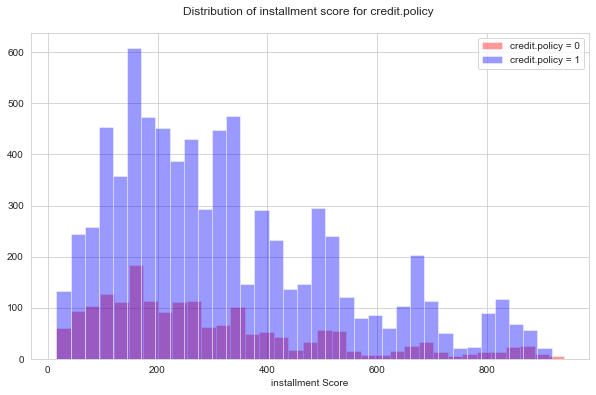

In [25]:
# Create a figure and axis with the specified figsize
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the distribution of 'fico' for not.fully.paid=0
sns.distplot(credit[credit['credit.policy'] == 0]['installment'], bins=35, kde=False, color='red', label='credit.policy = 0')

# Plot the distribution of 'fico' for not.fully.paid=1
sns.distplot(credit[credit['credit.policy'] == 1]['installment'], bins=35, kde=False, color='blue', label='credit.policy = 1')

# Add a legend to the plot
ax.legend(loc=1)

# Set the x-axis label
ax.set_xlabel('installment Score')

plt.title("Distribution of installment score for credit.policy \n")

Text(0.5, 1.0, 'Distribution of log.annual.inc for credit.policy \n')

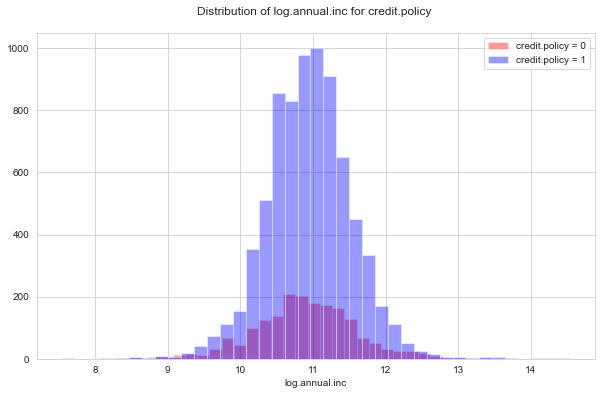

In [26]:
# Create a figure and axis with the specified figsize
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the distribution of 'fico' for not.fully.paid=0
sns.distplot(credit[credit['credit.policy'] == 0]['log.annual.inc'], bins=35, kde=False, color='red', label='credit.policy = 0')

# Plot the distribution of 'fico' for not.fully.paid=1
sns.distplot(credit[credit['credit.policy'] == 1]['log.annual.inc'], bins=35, kde=False, color='blue', label='credit.policy = 1')

# Add a legend to the plot
ax.legend(loc=1)

# Set the x-axis label
ax.set_xlabel('log.annual.inc')

plt.title("Distribution of log.annual.inc for credit.policy \n")

- we can see people who has lower income seems to be having more chance of not getting loan

###### Creating a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.

Text(0.5, 1.0, 'Countplot  of purpose for not.fully.paid \n')

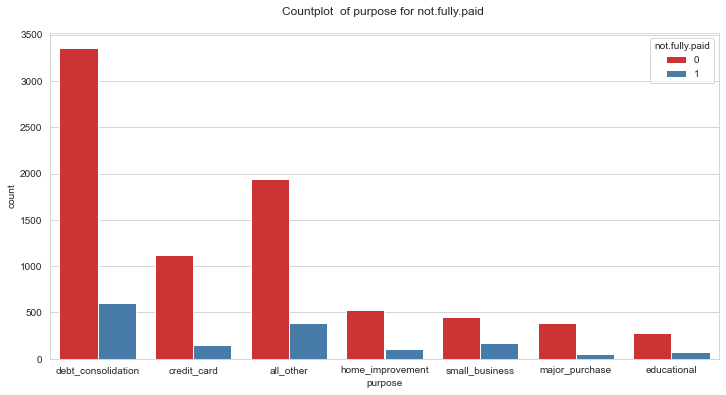

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', hue='not.fully.paid', data=credit, palette='Set1')
plt.title("Countplot  of purpose for not.fully.paid \n")

- Max no of pople who have not fully paid comes from debt_consolidation(who have already have a pile of loan)
- for all other purpose loan we are seeing another more no of people who have not fully paid . this is because these kind of loans can be more unsecured loan.

Now Checking the trend between FICO score and interest rate. Recreate the following jointplot.

Text(0.0, 1.0, 'JointPlot  of fico & int.rate ')

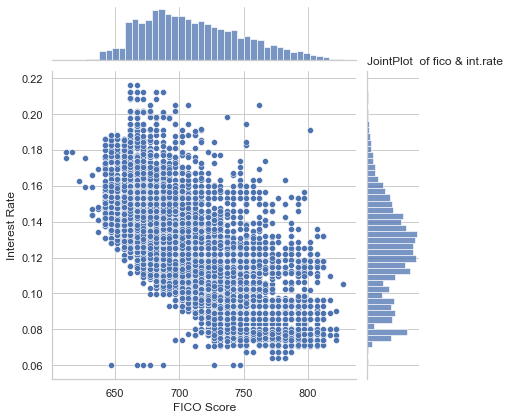

In [28]:
sns.set(style="whitegrid")
g = sns.jointplot(x='fico', y='int.rate', data=credit)
g.set_axis_labels("FICO Score", "Interest Rate")
plt.title("JointPlot  of fico & int.rate ",loc="left")

- > This seems to be fair , if you have high fico score then your rate of intrest is lesser.
- > Both seems to be mostly normally distributed.

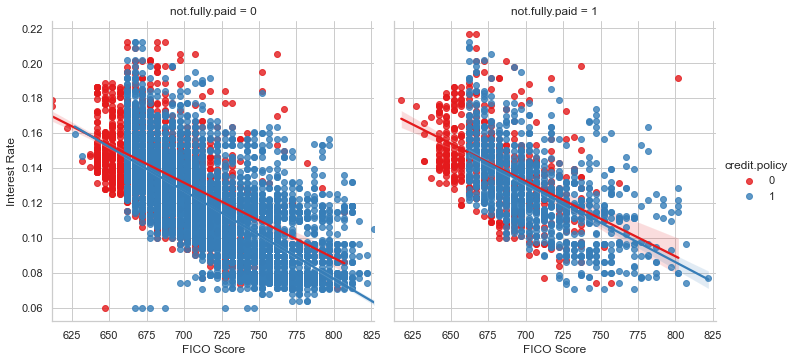

In [29]:
# Set the style
sns.set(style="whitegrid")
# Create the lmplot
g = sns.lmplot(x='fico', y='int.rate', col='not.fully.paid', hue='credit.policy', data=credit,palette='Set1')
# Set axis labels
g.set_axis_labels("FICO Score", "Interest Rate")
#g.set_titles("joint Regression plot of fico & int.rate with hue of credit_policy \n\n",loc='center')

## 3.	Data Pre-processing and cleaning 

######  a.	Do the appropriate preprocessing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Apply appropriate feature engineering techniques for them

- > ###### As we have seen we dont have any NULLL or missing data and not have any duplicated data so we dont need to handle it here

###### checking for outliers

In [30]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [31]:
 #we will create a dictionary which can have min_value = q1-1.5*IQR and max_value= q3+1.5*IQR
mix_max_value_by_IQR={}
for i in df.describe().columns:
    IQR=df.describe()[i]['75%']-df.describe()[i]['25%'] 
    max_val=round(df.describe()[i]['75%']+(1.5*IQR),3)
    min_val=round(df.describe()[i]['25%']-(1.5*IQR),3)
    mix_max_value_by_IQR[i]=[min_val,max_val]

In [32]:
mix_max_value_by_IQR

{'credit.policy': [1.0, 1.0],
 'int.rate': [0.049, 0.196],
 'installment': [-239.719, 836.251],
 'log.annual.inc': [9.459, 12.391],
 'dti': [-8.894, 34.056],
 'fico': [599.5, 819.5],
 'days.with.cr.line': [-1545.0, 10095.0],
 'revol.bal': [-19406.75, 40843.25],
 'revol.util': [-49.85, 143.35],
 'inq.last.6mths': [-3.0, 5.0],
 'delinq.2yrs': [0.0, 0.0],
 'pub.rec': [0.0, 0.0],
 'not.fully.paid': [0.0, 0.0]}

In [33]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


- > by compairing  above two block data  we can see

    - int.rate,
    
    - log.annual.inc,
    
    - days.with.cr.line,
    
    - revol.bal and
    
    - inq.last.6mths 
    
    seems be either skewed or may have outliers

###### Intrest rate

Text(0.5, 1.0, 'Histrogram for intrest rate')

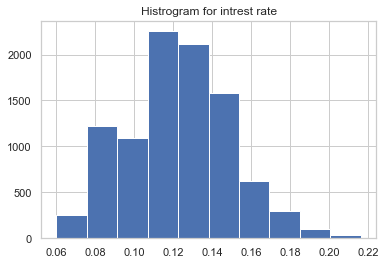

In [35]:
plt.hist((df['int.rate']))
plt.title("Histrogram for intrest rate")

Text(0.5, 1.0, 'boxplot for intrest rate')

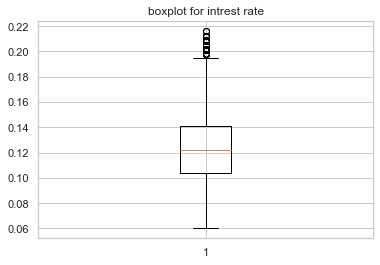

In [36]:
plt.boxplot(df['int.rate']);
plt.title("boxplot for intrest rate")

In [37]:
#we can see above 0.20 it seem to be outliers, lets see how many rows are outliers

In [38]:
df[df['int.rate']>0.20].shape

(37, 14)

In [39]:
#total 37 rows

In [40]:
df[df['int.rate']>0.20]['not.fully.paid'].value_counts()

0    24
1    13
Name: not.fully.paid, dtype: int64

In [41]:
#so we dont see any discrepency for not.fully.paid for such outliers

In [42]:
37/5798

0.006381510865815798

In [311]:
df[df['int.rate']>0.21]# lets increase it by 0.01 point

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
5679,1,debt_consolidation,0.2121,746.24,11.736069,19.87,662,7920.000000,90063,79.6,1,0,0,1
5868,1,small_business,0.2121,491.20,11.957611,10.45,667,3538.000000,14718,40.4,1,0,0,0
6202,1,small_business,0.2121,755.69,11.248960,5.72,672,1440.000000,500,83.3,1,0,0,0
6517,1,debt_consolidation,0.2121,816.14,11.034890,15.45,667,3120.041667,10190,98.9,1,0,0,0
9328,0,small_business,0.2121,94.47,11.376418,5.21,687,12150.000000,52702,41.1,6,2,0,0
9346,0,debt_consolidation,0.2121,340.06,11.407565,10.24,682,1452.000000,6089,45.1,10,0,0,0
9372,0,small_business,0.2121,188.93,11.002100,0.36,662,3660.041667,581,12.1,5,2,0,0
9549,0,home_improvement,0.2164,729.70,11.877569,8.63,667,8280.041667,55442,66.9,9,0,1,1
9566,0,all_other,0.2164,551.08,11.002100,24.06,662,1800.000000,16441,49.8,9,0,0,1


- > we dont see outher features as outlier for this high intrest rate , So we can keep it

###### log.annual.inc

Text(0.5, 1.0, 'Histrogram for log.annual.inc')

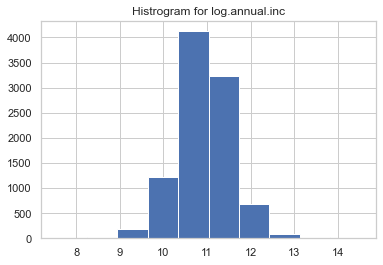

In [43]:
plt.hist((df['log.annual.inc']));
plt.title("Histrogram for log.annual.inc")

Text(0.5, 1.0, 'boxplot for log.annual.inc')

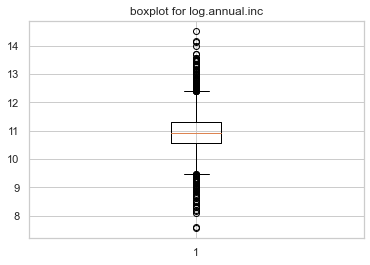

In [44]:
plt.boxplot(df['log.annual.inc']);
plt.title("boxplot for log.annual.inc")

In [45]:

#we can see above 0.20 it seem to be outliers, lets see how many rows are outliers

df[df['log.annual.inc']>13].shape

(33, 14)

In [46]:
df[df['log.annual.inc']>13]['not.fully.paid'].value_counts()

0    27
1     6
Name: not.fully.paid, dtype: int64

In [47]:
df[df['log.annual.inc']<9].shape

(41, 14)

In [48]:
df[df['log.annual.inc']<9]['not.fully.paid'].value_counts()
#total 37 rows

0    31
1    10
Name: not.fully.paid, dtype: int64

In [49]:
#so we dont see any discrepency for log.annual.inc for such outliers



- > we dont see outher features as outlier for this high or low log.annual.inc , So we can keep it

###### days.with.cr.line

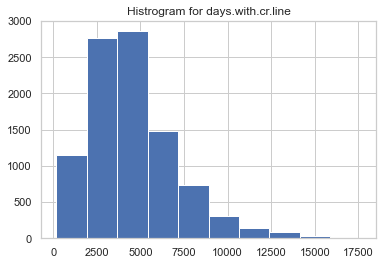

In [50]:
plt.hist((df['days.with.cr.line']));
plt.title("Histrogram for days.with.cr.line");

Text(0.5, 1.0, 'boxplot for days.with.cr.line')

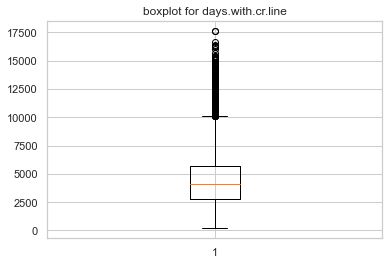

In [51]:
plt.boxplot(df['days.with.cr.line']);
plt.title("boxplot for days.with.cr.line")

In [321]:
mix_max_value_by_IQR['days.with.cr.line']

[-1545.0, 10095.0]

In [322]:

#we can see above 0.20 it seem to be outliers, lets see how many rows are outliers

df[df['days.with.cr.line']>10095].shape

(346, 14)

In [323]:
df[df['days.with.cr.line']>10095]['not.fully.paid'].value_counts()

0    303
1     43
Name: not.fully.paid, dtype: int64

##### as the feature is skewed we can use log transformation

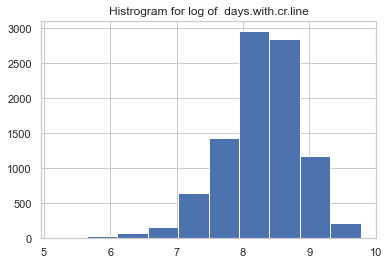

In [52]:
plt.hist(np.log(df['days.with.cr.line']));
plt.title("Histrogram for log of  days.with.cr.line");

##### this seems to be better

In [144]:
# using log transformation
df['log_days.with.cr.line']=np.log(df['days.with.cr.line'])

#### revol.bal 

Text(0.5, 1.0, 'Histrogram for revol.bal')

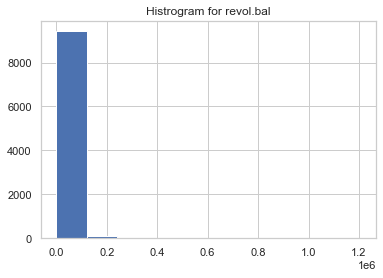

In [53]:
plt.hist(df['revol.bal']);
plt.title("Histrogram for revol.bal")

Text(0.5, 1.0, 'boxplot for revol.bal')

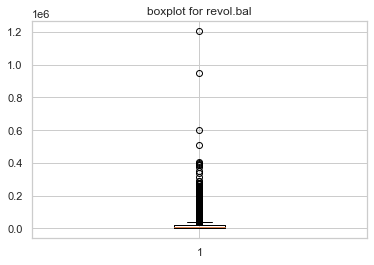

In [54]:
plt.boxplot(df['revol.bal']);
plt.title("boxplot for revol.bal")

In [150]:
mix_max_value_by_IQR['revol.bal']

[-19406.75, 40843.25]

In [152]:
df['revol.bal'].max()

1207359

In [154]:
df['revol.bal'].describe()

count    9.578000e+03
mean     1.691396e+04
std      3.375619e+04
min      0.000000e+00
25%      3.187000e+03
50%      8.596000e+03
75%      1.824950e+04
max      1.207359e+06
Name: revol.bal, dtype: float64

In [153]:
#we can see above 40843.25 it seem to be outliers, lets see how many rows are outliers

df[df['revol.bal']>50000].shape

(604, 15)

In [168]:
#lets make it double
df[df['revol.bal']>100000].shape

(205, 15)

###### let see the percentile

In [176]:
np.percentile(df['revol.bal'],99)

156762.58

In [324]:
df[df['revol.bal']>np.percentile(df['revol.bal'],99)]['not.fully.paid'].value_counts()

0    64
1    32
Name: not.fully.paid, dtype: int64

- >   **so we can see abobe 99% below the revol.bal in data all customers are not getting loan, we can remove it but problem is we will loose negative points and it weill increase more imabalcing in data.So even we can see it could be outliers ,But it could be a perfect predictor as if customer have more unpaid balance then it can be more probale borrower would not pay back their loan in full .**

##### inq.last.6mths

Text(0.5, 1.0, 'Histrogram for inq.last.6mths')

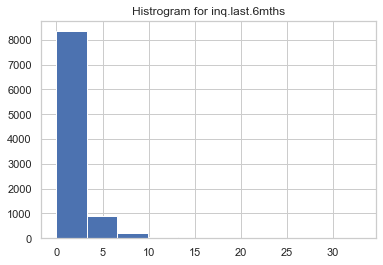

In [55]:
plt.hist(df['inq.last.6mths']);
plt.title("Histrogram for inq.last.6mths")


Text(0.5, 1.0, 'boxplot for inq.last.6mths')

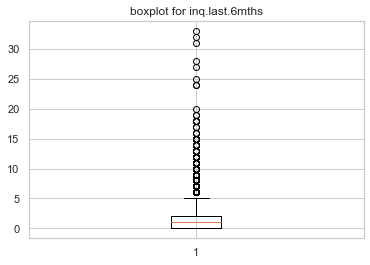

In [56]:
plt.boxplot(df['inq.last.6mths']);
plt.title("boxplot for inq.last.6mths")

In [182]:
mix_max_value_by_IQR['inq.last.6mths']

[-3.0, 5.0]

In [183]:
df['inq.last.6mths'].max()

33

In [184]:
df['inq.last.6mths'].describe()

count    9578.000000
mean        1.577469
std         2.200245
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        33.000000
Name: inq.last.6mths, dtype: float64

In [185]:
#we can see above 5 it seem to be outliers, lets see how many rows are outliers

df[df['inq.last.6mths']>5].shape

(478, 15)

In [187]:
#lets make it double
df[df['inq.last.6mths']>10].shape

(71, 15)

###### let see the percentile

In [188]:
np.percentile(df['inq.last.6mths'],99)

9.0

In [325]:
df[df['inq.last.6mths']>np.percentile(df['inq.last.6mths'],99)]['not.fully.paid'].value_counts()

0    63
1    31
Name: not.fully.paid, dtype: int64

- >   **so we can see abobe 99% below the revol.bal in data all customers are not getting loan, we can remove it but problem is we will loose negative points and it weill increase more imabalcing in data.So even we can see it could be outliers ,But it could be a perfect predictor as if customer have more loan inquiry then  it can be more probale borrower would not pay back their loan in full**

#### Now lets dop the "days.with.cr.line" columns as we are going to use the log transformation of it

In [195]:
df.drop(['days.with.cr.line'],axis=1,inplace=True)

### b.	Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset.

In [331]:
features=df.drop(['not.fully.paid'],axis=1)
target=df['not.fully.paid']

In [243]:
# we have below numerical columns

In [244]:
features.columns

Index(['purpose', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'not.fully.paid', 'log_days.with.cr.line'],
      dtype='object')

In [245]:
numerical_features=['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'log_days.with.cr.line']
categorical_features=['purpose', 'credit.policy']

###### Transforning Categorical Features

In the dataset "purpose" column is categorical

That means we need to transform them using either label encoding or dummy variables.As we have very less numbers of columns we can use the dummy varibles as increasing a dimension will not ne affected by curse of dimensionality.

In [246]:
#DataFrame named 'credit' and a list named 'purpose_feature'

# Create dummy variables for categorical features in the 'purpose_feature' list
data_categorical = pd.get_dummies(df[categorical_features], columns=['purpose'], drop_first=True)

In [247]:
data_categorical.head()

,credit.policy,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0,1,0,0,0,0
1,1,1,0,0,0,0,0
2,1,0,1,0,0,0,0
3,1,0,1,0,0,0,0
4,1,1,0,0,0,0,0


##### Transforming numerical columns

- >  Most data are in mostly normal distribution so we should use standdard scaler which will standardixe data in form of mean=0, standard deviation=1

In [248]:
from sklearn.preprocessing import StandardScaler

In [249]:
df[numerical_features]

,int.rate,installment,log.annual.inc,dti,fico,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,log_days.with.cr.line
0,0.1189,829.10,11.350407,19.48,737,28854,52.1,0,0,0,8.637632
1,0.1071,228.22,11.082143,14.29,707,33623,76.7,0,0,0,7.922986
2,0.1357,366.86,10.373491,11.63,682,3511,25.6,1,0,0,8.457443
3,0.1008,162.34,11.350407,8.10,712,33667,73.2,1,0,0,7.900992
4,0.1426,102.92,11.299732,14.97,667,4740,39.5,0,1,0,8.310415
...,...,...,...,...,...,...,...,...,...,...,...
9573,0.1461,344.76,12.180755,10.39,672,215372,82.1,2,0,0,9.256651
9574,0.1253,257.70,11.141862,0.21,722,184,1.1,5,0,0,8.384804
9575,0.1071,97.81,10.596635,13.09,687,10036,82.9,8,0,0,8.146142
9576,0.1600,351.58,10.819778,19.18,692,0,3.2,5,0,0,7.495542


In [250]:
scaler=StandardScaler()

data_numerical= scaler.fit_transform(df[numerical_features])

In [251]:
data_numerical=pd.DataFrame(data_numerical,columns=numerical_features)

In [252]:
data_numerical

,int.rate,installment,log.annual.inc,dti,fico,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,log_days.with.cr.line
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.353732,0.182704,-0.716989,-0.299730,-0.237003,0.615370
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,0.495018,1.030602,-0.716989,-0.299730,-0.237003,-0.567070
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,0.317233
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,0.496321,0.909966,-0.262470,-0.299730,-0.237003,-0.603461
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,0.073963
...,...,...,...,...,...,...,...,...,...,...,...
9573,0.873884,0.123976,2.031030,-0.322023,-1.023118,5.879467,1.216726,0.192048,-0.299730,-0.237003,1.639588
9574,0.099083,-0.296481,0.341170,-1.800898,0.293761,-0.495638,-1.575135,1.555604,-0.299730,-0.237003,0.197045
9575,-0.578868,-1.068670,-0.545694,0.070213,-0.628054,-0.203765,1.244300,2.919159,-0.299730,-0.237003,-0.197841
9576,1.391660,0.156914,-0.182730,0.954924,-0.496366,-0.501089,-1.502753,1.555604,-0.299730,-0.237003,-1.274311


In [328]:
#now append the data
transormed_data= pd.concat([data_categorical,data_numerical,target],axis=1)

In [329]:
transormed_data

,credit.policy,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,int.rate,installment,log.annual.inc,dti,fico,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,log_days.with.cr.line,not.fully.paid
0,1,0,1,0,0,0,0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.353732,0.182704,-0.716989,-0.299730,-0.237003,0.615370,0
1,1,1,0,0,0,0,0,-0.578868,-0.438854,0.244031,0.244540,-0.101303,0.495018,1.030602,-0.716989,-0.299730,-0.237003,-0.567070,0
2,1,0,1,0,0,0,0,0.486484,0.230708,-0.908659,-0.141885,-0.759742,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,0.317233,0
3,1,0,1,0,0,0,0,-0.813544,-0.757022,0.680388,-0.654697,0.030385,0.496321,0.909966,-0.262470,-0.299730,-0.237003,-0.603461,0
4,1,1,0,0,0,0,0,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,0.073963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0,0,0,0,0,0.873884,0.123976,2.031030,-0.322023,-1.023118,5.879467,1.216726,0.192048,-0.299730,-0.237003,1.639588,1
9574,0,0,0,0,0,0,0,0.099083,-0.296481,0.341170,-1.800898,0.293761,-0.495638,-1.575135,1.555604,-0.299730,-0.237003,0.197045,1
9575,0,0,1,0,0,0,0,-0.578868,-1.068670,-0.545694,0.070213,-0.628054,-0.203765,1.244300,2.919159,-0.299730,-0.237003,-0.197841,1
9576,0,0,0,0,1,0,0,1.391660,0.156914,-0.182730,0.954924,-0.496366,-0.501089,-1.502753,1.555604,-0.299730,-0.237003,-1.274311,1


#### c.	Do the correlational analysis on the dataset. Provide a visualization for the same. (1 M)

In [326]:
df.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


Text(0.5, 1.0, 'Heatmap for dataset')

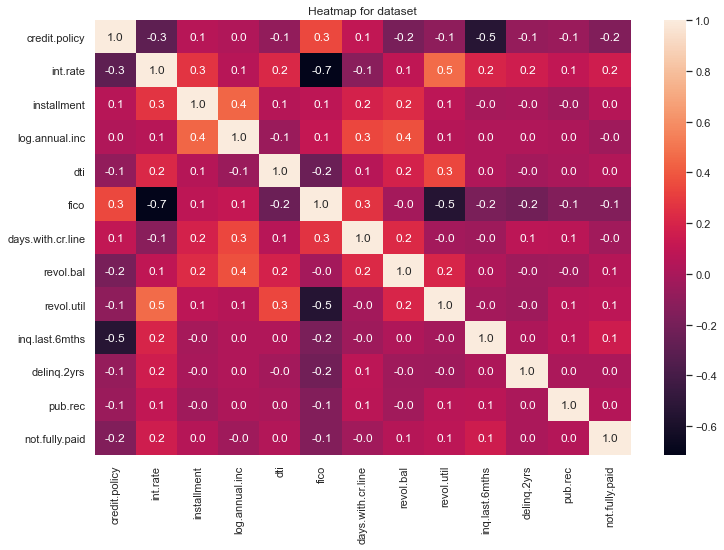

In [330]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt=".1f")
plt.title("Heatmap for dataset")

- > we can see "Fico" score and "intrest rate" are well negatively correlated.

## 4.	Data Preparation (2 Marks)

#### a. Do the final feature selection and extract them into Column X and the class label into Column into Y

In [336]:
X=transormed_data.drop(['not.fully.paid'],axis=1)## features
Y=transormed_data['not.fully.paid']##target

In [337]:
from sklearn.model_selection import train_test_split

In [428]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=98,stratify=Y)


## Part B 


### 1.	Model Building


#### a.	Perform Model Development using at least three models, separately. You are free to apply any Machine Learning Models on the dataset.

#### b.	 Train the model and print the training accuracy and loss values. 

##### 1.1 Decision Tree Model

In [433]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,plot_confusion_matrix
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_predict_test = dtree.predict(X_test)
y_predict_train = dtree.predict(X_train)

print("Decision Tree train  Accurcay/loss value")
print(round(accuracy_score(y_train, y_predict_train),3),"\n")
print("*"*80,"\n")
print("Decision Tree test Accurcay/loss")
print(round(accuracy_score(y_test, y_predict_test),3),"\n")

Decision Tree train  Accurcay/loss value
1.0 

******************************************************************************** 

Decision Tree test Accurcay/loss
0.73 



#### 1.2 Random Forest model

In [434]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators = 100)
rforest.fit(X_train, y_train)
y_predict_test = rforest.predict(X_test)
y_predict_train = rforest.predict(X_train)
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,plot_confusion_matrix
print("Random Forest train  Accurcay")
print(round(accuracy_score(y_train, y_predict_train),3),"\n")
print("*"*80,"\n")
print("Random Forest test Accurcay/loss")
print(round(accuracy_score(y_test, y_predict_test),3),"\n")
print("*"*80,"\n")

Random Forest train  Accurcay
1.0 

******************************************************************************** 

Random Forest test Accurcay/loss
0.838 

******************************************************************************** 



#### 1.3 SVM model

In [435]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

y_predict_test = svm_classifier.predict(X_test)
y_predict_train = svm_classifier.predict(X_train)
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,plot_confusion_matrix,precision_score,recall_score,f1_score
print("SVM train  Accurcay/loss")
print(round(accuracy_score(y_train, y_predict_train),3),"\n")
print("*"*80,"\n")
print("SVM test Accurcay/loss")
print(round(accuracy_score(y_test, y_predict_test),3),"\n")
print("*"*80,"\n")


SVM train  Accurcay/loss
0.842 

******************************************************************************** 

SVM test Accurcay/loss
0.84 

******************************************************************************** 



### 2.	Performance Evaluation 


####  a.	Print the confusion matrix. Provide appropriate analysis for the same.

####  b.	Do the prediction for the test data and display the results for the inference.

#### In general practice , Confusion matrix on train data dont have any essense , so we are creating confusion matrix on test data by predicting via different models

DecisionTree Confusion Matrix:


Text(0.5, 1.0, 'confustion matrix for Decison Tree classifier on test data')

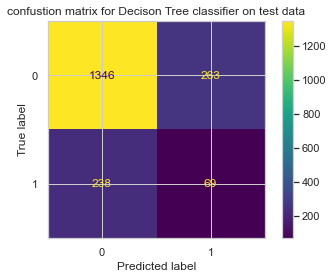

In [390]:
print("DecisionTree Confusion Matrix:") ;
plot_confusion_matrix(dtree,X_test, y_test);
plt.title("confustion matrix for Decison Tree classifier on test data")

Random Forest Confusion Matrix:


Text(0.5, 1.0, 'confustion matrix for Random Forest classifier on test data')

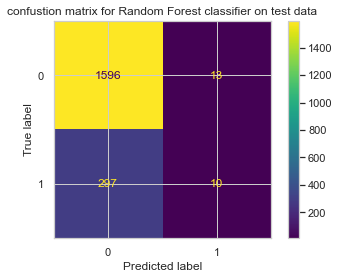

In [395]:
print("Random Forest Confusion Matrix:") ;
plot_confusion_matrix(rforest,X_test, y_test);
plt.title("confustion matrix for Random Forest classifier on test data")

SVM Confusion Matrix:


Text(0.5, 1.0, 'confustion matrix for SVM classifier on test data')

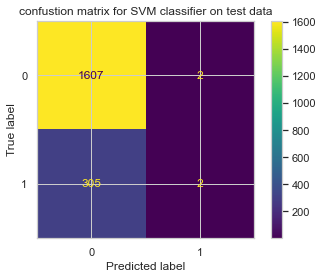

In [397]:
print("SVM Confusion Matrix:") ;
plot_confusion_matrix(svm_classifier,X_test, y_test);
plt.title("confustion matrix for SVM classifier on test data")

In [422]:
models={"Decisiontree":dtree,"Randomforest":rforest,"svm_classifier":svm_classifier}

In [423]:
dictis={}
for i,j in models.items():
    dictis[i]={}
    dictis[i]['TP']=confusion_matrix(y_test,j.predict(X_test))[0][0]
    dictis[i]['FP']=confusion_matrix(y_test,j.predict(X_test))[0][1]
    dictis[i]['FN']=confusion_matrix(y_test,j.predict(X_test))[1][0]
    dictis[i]['TN']=confusion_matrix(y_test,j.predict(X_test))[1][1]
    dictis[i]['Accuracy']=accuracy_score(y_test,j.predict(X_test))
    dictis[i]['precision']=precision_score(y_test,j.predict(X_test))
    dictis[i]['recall']=recall_score(y_test,j.predict(X_test))
    dictis[i]['f1-score']=f1_score(y_test,j.predict(X_test)) 
    

In [424]:
pd.DataFrame(dictis).T

,TP,FP,FN,TN,Accuracy,precision,recall,f1-score
Decisiontree,1364.0,245.0,236.0,71.0,0.748956,0.224684,0.231270,0.227929
Randomforest,1596.0,13.0,297.0,10.0,0.838205,0.434783,0.032573,0.060606
svm_classifier,1607.0,2.0,305.0,2.0,0.839770,0.500000,0.006515,0.012862


### Analysis based on cofusion matrix and different scores


- > Accuracy could not be a better measure as we have imbalanced data.

- > IF False postives are more important than False negative Random Forest could be a better option for choosing for modeling.

- > IF False Negatives  are more important than False Positives then Decision Tree could be a better option for choosing for modeling.

- > if both precision and recall are equally important then according to F1 score , dtree could be best option
